## Using Oceanbolt Data to do count Suez Canal crossings

In this notebook we will go through how you can use the Oceanbolt SDK
to the count number of vessels that have passed through Suez in the recent years on a monthly/weekly basis.

In [147]:
#Setup client and import libraries. Apikey is set via .env file.
%load_ext dotenv
%dotenv

from oceanbolt.sdk.client import APIClient
from oceanbolt.sdk.data.tonnage import ZoneChangesTimeseries
from oceanbolt.sdk.data.entities import Zones
from datetime import date
import matplotlib.pyplot as plt

tonnage_client =ZoneChangesTimeseries(APIClient())

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [148]:
#List the available zones
zones = Zones(APIClient()).get()
zones

,zone_id,zone_name
0,16,Baltic Sea
1,70,Barrents Sea
2,22,Bay of Bengal
3,46,Bay of Biscay
4,11,Black Sea
5,9,East Atlantic Ocean (Africa)
6,2,East China Sea
7,52,East Coast Australia
8,58,East Coast South America
9,13,East Indian Ocean


In [149]:
# Specify relevant zones. Zones can also be collected from the Zone Visualizer in the Oceanbolt Platform
mediterranean_zones = [11, 18, 21]
red_sea_ag_zones = [17, 35, 96, 8]

In [150]:
# Zones have been collected from the Zone Visualizer in the Oceanbolt Platform
mediterranean_zones = [11, 18, 21]
red_sea_ag_zones = [17, 35, 96, 8]

### Investing Suez Canal Crossings on a monthly basis split by segment
We will now investigate how many vessels have crossed on a monthly basis split by segments.

In [151]:
# Get daily south bound crossings split by sub segment
south_bound_crossings = tonnage_client.get(
    start_date=date(2018,1,1),
    from_zone_id=mediterranean_zones,
    to_zone_id=red_sea_ag_zones,
    frequency="monthly",
    group_by="segment"
)

# Get north bound crossings split by sub segment
north_bound_crossings = tonnage_client.get(
    start_date=date(2018,1,1),
    from_zone_id=red_sea_ag_zones,
    to_zone_id=mediterranean_zones,
    frequency="monthly",
    group_by="segment"
)

north_bound_crossings.head(10)

,group,date,value
0,Shortsea,2018-01-01,10
1,Shortsea,2018-02-01,7
2,Shortsea,2018-03-01,12
3,Shortsea,2018-04-01,8
4,Shortsea,2018-05-01,14
5,Shortsea,2018-06-01,11
6,Shortsea,2018-07-01,10
7,Shortsea,2018-08-01,7
8,Shortsea,2018-09-01,6
9,Shortsea,2018-10-01,8


In [152]:
#See how the monthly number of crossings have developed in the past 3 years. We need to pivot to plot the data.
north_bound_crossings_pivoted = north_bound_crossings.pivot(index="date",columns="group",values="value")

north_bound_crossings_pivoted.head(5)

group,Capesize,Handysize,Panamax,Shortsea,Supramax
date,,,,,
2018-01-01,7,47,28,10,63
2018-02-01,7,37,22,7,44
2018-03-01,7,57,32,12,59
2018-04-01,3,44,20,8,53
2018-05-01,5,56,40,14,66


<AxesSubplot:title={'center':'Monthly North Bound Suez Channel Crossings (Dry Bulk split by segment)'}, xlabel='date'>

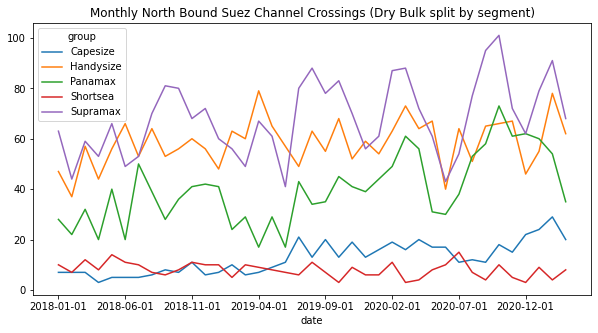

In [153]:
#Plot the data
north_bound_crossings_pivoted.plot(title="Monthly North Bound Suez Channel Crossings (Dry Bulk split by segment)",figsize=(10,5))

### Investing Suez Canal Crossings on a weekly basis
We will now investigate how many vessels have crossed on a weekly basis for all segments.

In [154]:
#Get south bound crossings on weekly basis
south_bound_crossings_weekly = tonnage_client.get(
    start_date=date(2018,1,1),
    from_zone_id=mediterranean_zones,
    to_zone_id=red_sea_ag_zones,
    frequency="weekly",
)

south_bound_crossings_weekly.tail(5)


,date,value
164,2021-02-22,59
165,2021-03-01,73
166,2021-03-08,56
167,2021-03-15,59
168,2021-03-22,11


<AxesSubplot:title={'center':'Weekly South Bound Suez Crossings (All Dry Bulk Vessels)'}, xlabel='date'>

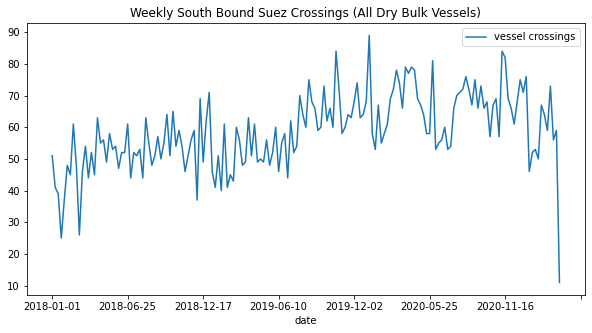

In [155]:
# Let us plot the results
south_bound_crossings_weekly = south_bound_crossings_weekly.rename(columns={"value":"vessel crossings"})
south_bound_crossings_weekly.plot(title="Weekly South Bound Suez Crossings (All Dry Bulk Vessels)",x='date', figsize=(10,5))


In [156]:
#Get north bound crossings on weekly basis
north_bound_crossings_weekly = tonnage_client.get(
    start_date=date(2018,1,1),
    from_zone_id=red_sea_ag_zones,
    to_zone_id=mediterranean_zones,
    frequency="weekly",
)
north_bound_crossings_weekly.tail(5)

,date,value
164,2021-02-22,70
165,2021-03-01,52
166,2021-03-08,71
167,2021-03-15,63
168,2021-03-22,7


,date,vessel crossings
0,2018-01-01,30
1,2018-01-08,44
2,2018-01-15,28
3,2018-01-22,31
4,2018-01-29,38
...,...,...
164,2021-02-22,70
165,2021-03-01,52
166,2021-03-08,71
167,2021-03-15,63


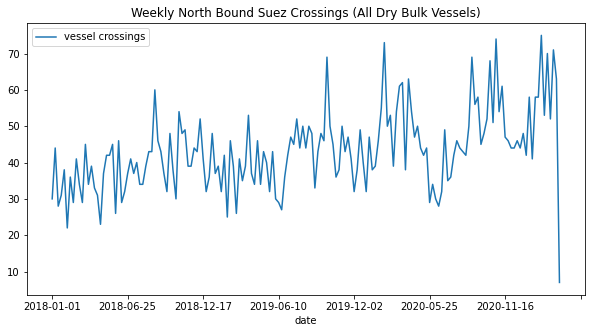

In [157]:
north_bound_crossings_weekly = north_bound_crossings_weekly.rename(columns={"value":"vessel crossings"})
north_bound_crossings_weekly.plot(title="Weekly North Bound Suez Crossings (All Dry Bulk Vessels)", x='date', figsize=(10,5))
north_bound_crossings_weekly